In [37]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# setup disply parameters
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
float_formatter = StrMethodFormatter('{x:0.03f}')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(18, 6)) # set figure size
plt.rc("animation", html="html5")
import random
random.seed(203)
import numpy as np
np.random.seed(345)
from rich import print

In [38]:
from pathlib import Path

## Running a Multi-deal negotiation

ANL 2025's challenge is to develop agents capable of negotiating sequentially a set of interrelated deals (multi-deal negotiation). You can create and run a multi-deal negotiation using special tools provided by the anl2025 package. If you haven't read the call for participation yet, do it first [here](https://drive.google.com/drive/folders/1xc5qt7XlZQQv6q1NVnu2vP6Ou-YOQUms?usp=drive_link). We introduce a target quantity scenario, where a buyer wants to acquire a total of 10 chips from 4 different sellers.

### An example multi-deal session: Target Quantity
We provide a set of test scenarios that you can download from the [ANL 2025 Google Drive](https://drive.google.com/drive/folders/1xc5qt7XlZQQv6q1NVnu2vP6Ou-YOQUms?usp=drive_link). The following code shows how to load a scenario from a folder.


In [46]:
from anl2025.scenario import MultidealScenario
import pathlib

path = pathlib.Path("../../scenarios/TargetQuantity_example") #You can also use a absolute path to the scenario here.
scenario = (MultidealScenario.from_folder(path))


For running a negotiation, we don't just need a scenario: we also need negotiators! Therefore, we add some standard negotiators such as a `Random` .agent, a `Boulware` and a `Linear` conceder. We add a *center*  agent that negotiates with multiple opponents, the so-called *edge agents*.


In [47]:
from anl2025.negotiator import (
    Boulware2025,
    Random2025,
    Linear2025
)

centeragent = Boulware2025
edgeagents = [
        Random2025,
         Random2025,
        Linear2025,
        Boulware2025,
    ]

Now the only thing we need to do to run a negotiation, is add this all together. There are many parameters that you can change yourself, such as the center agent, edge agents and maximum number of rounds (`nsteps`).

The function `run_session` runs one sequential multi-deal negotiation. In ANL 2025, the center agent negotiates with the side agents sequentially. It completes a negotiation with one edge agent before starting the next negotiation with the next edge agent. At no time does the center agent have multiple negotiation threads running at the same time.

Behind the scenes, a lot of things happen in this small function. The function `run_session` automatically outputs logs of each thread, specifying what bid happened at what round. Moreover, it outputs a graph of the utilities of the center agent and the edge agents. By default, you can find this folder here **...\negmas\anl2025\session**.

Below, we show the outputted graphs. On the left, one can see the bids that were posed, with the utility of the center agent on the y-axis and the utility of the edge agent on the x-axis. The right figures show the bids over time, one for both agents.

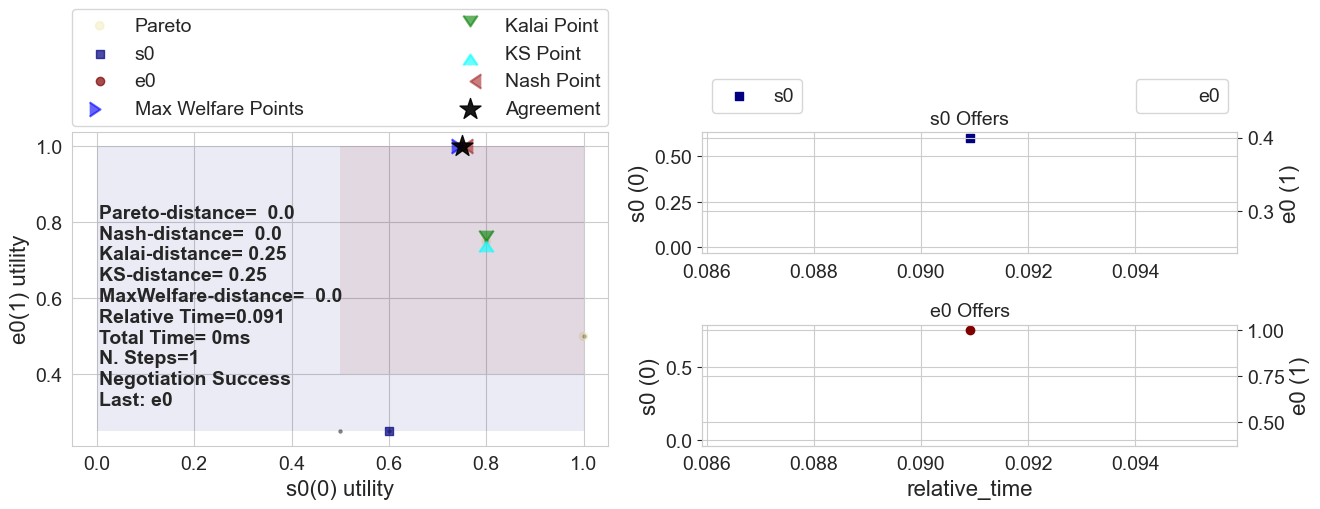

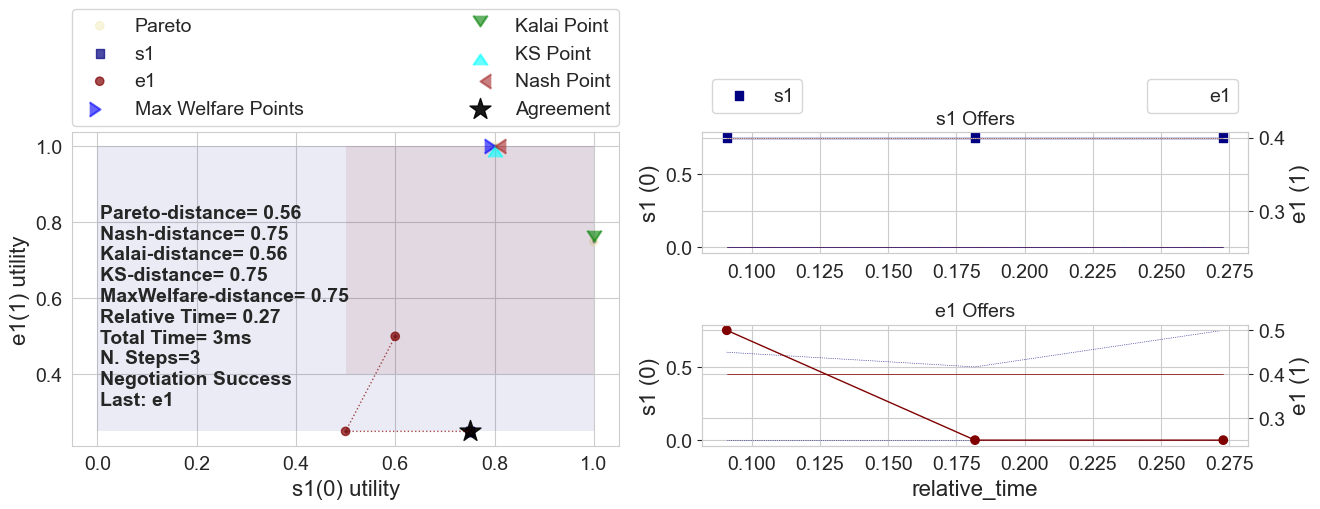

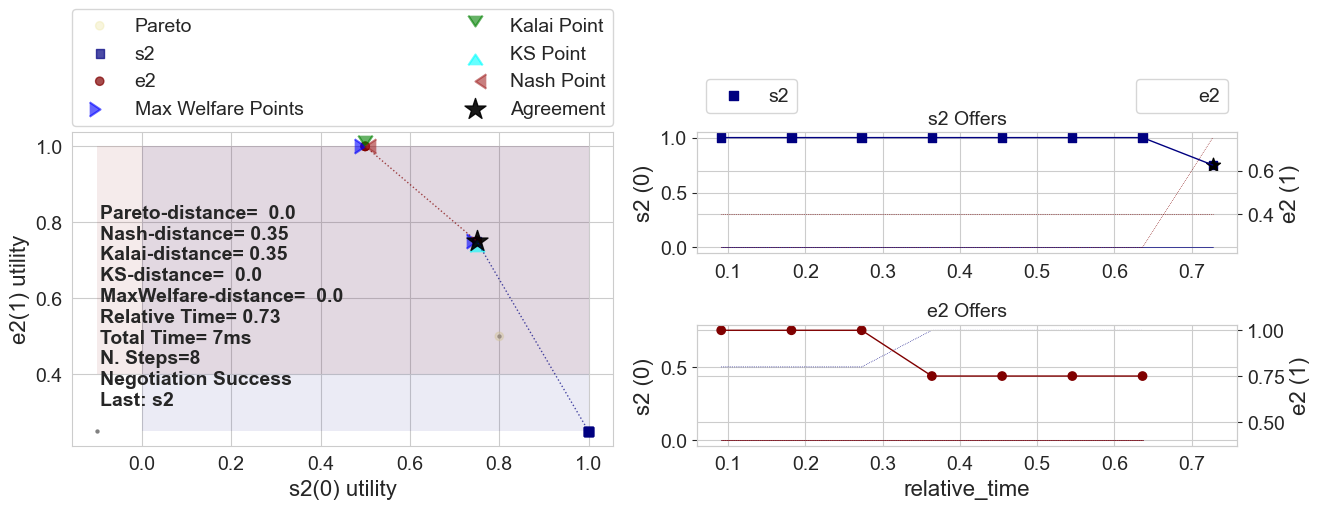

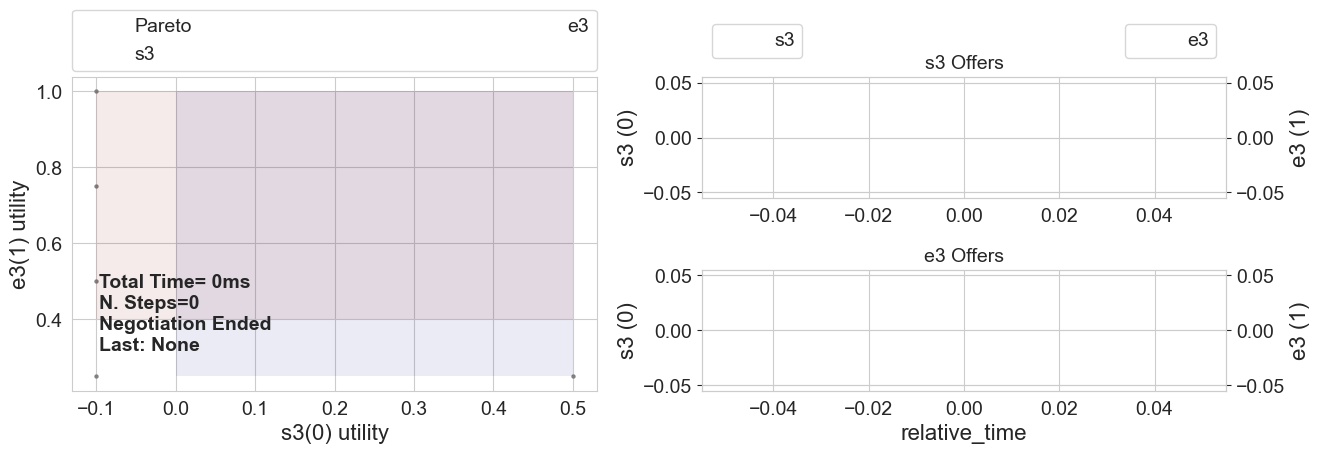

In [48]:
from anl2025 import run_session

results = run_session(
                scenario=scenario,
                center_type=centeragent,
                edge_types=edgeagents,
                nsteps=10)

You can also ask for specific types of output, by looking into `results`, e.g.:

In [49]:

print(f"Center utility: {results.center_utility}")
print(f"Edge Utilities: {results.edge_utilities}")
print(f"Agreement: {results.agreements}")

Center utility: 0.75

Edge Utilities: [1.0, 0.25, 0.75, 0.4]

Agreement: [('4',), ('5',), ('3',), None]

### A dinners' scheduling session

In the previous example, the center utility function was defined in terms of individual side utility functions (one per negotiation threads). A more general case is when the center utility function is defined directly in terms of the outcomes of negotiation threads without locally defined utility functions. The following figure shows an example of this kind of scenario:

![Global Utility Function Example](Slide1.jpeg)

The `anl2025` package allows you to create such scenarios using the `LambdaCenterUFun` class (See Reference). One class of these scenarios is the **Dinners** scenarios in which one person (center agent) is negotiating with her friends (edge agents) about the day to go out for dinner. Each friend has her own utility function for different days. The center agent has a utility for each combination of agreements (i.e. she may prefer to go out once every night except in Tuesdays,

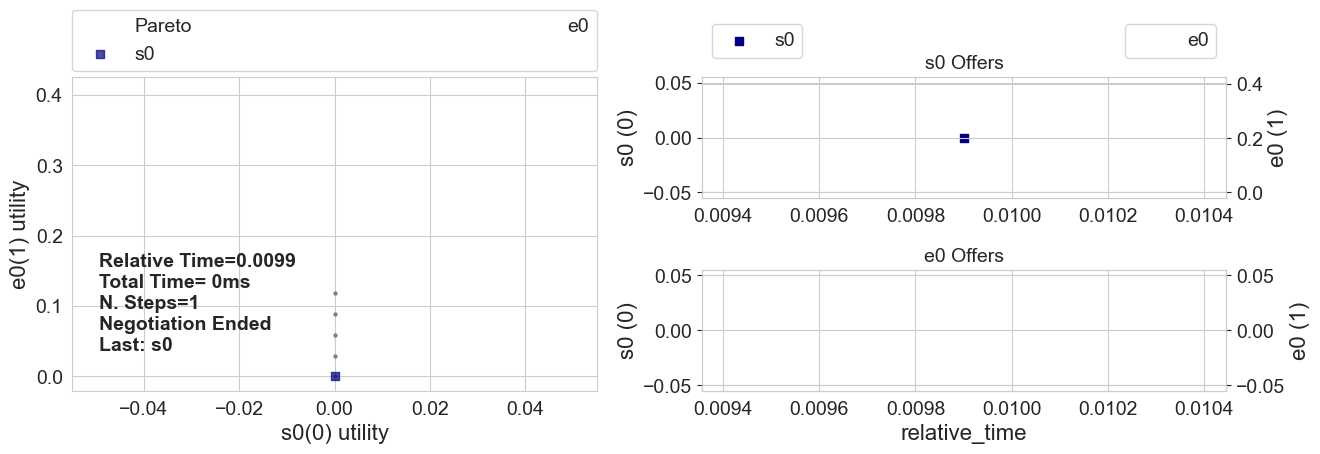

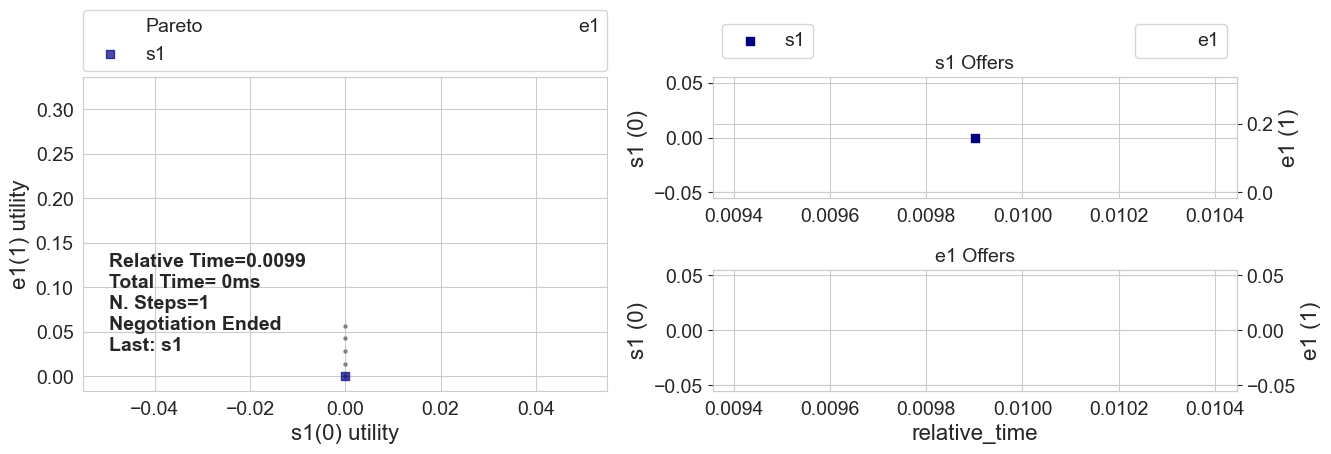

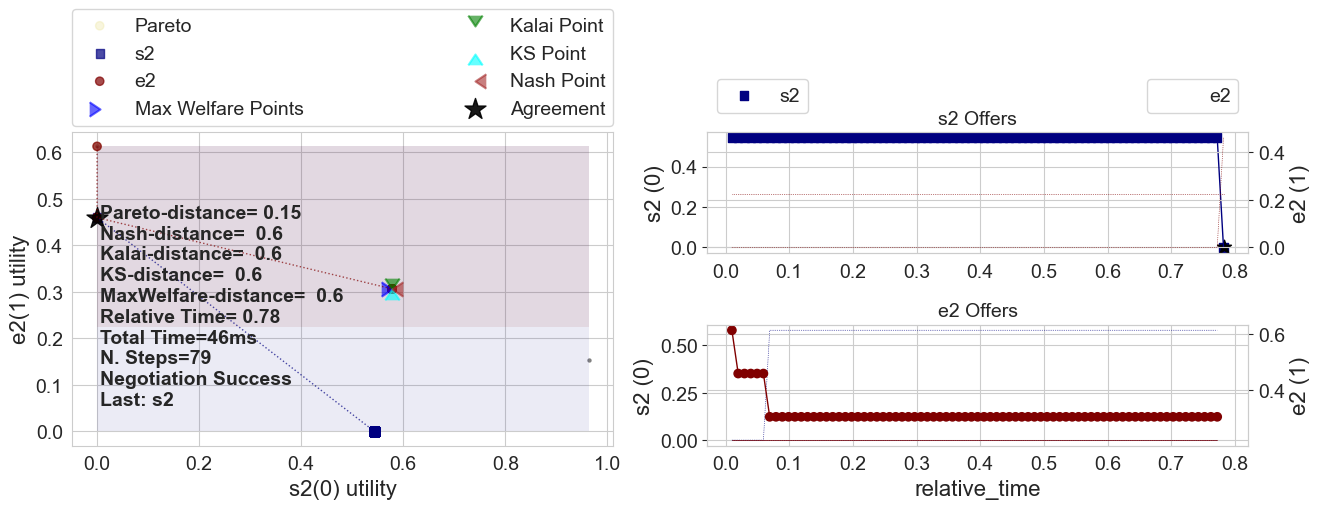

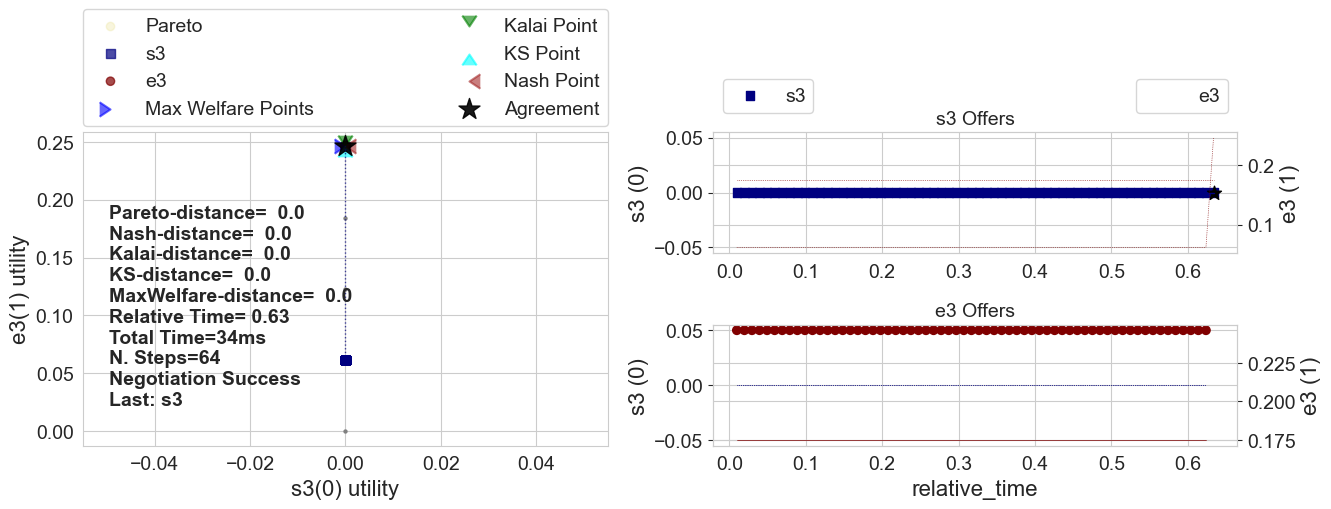

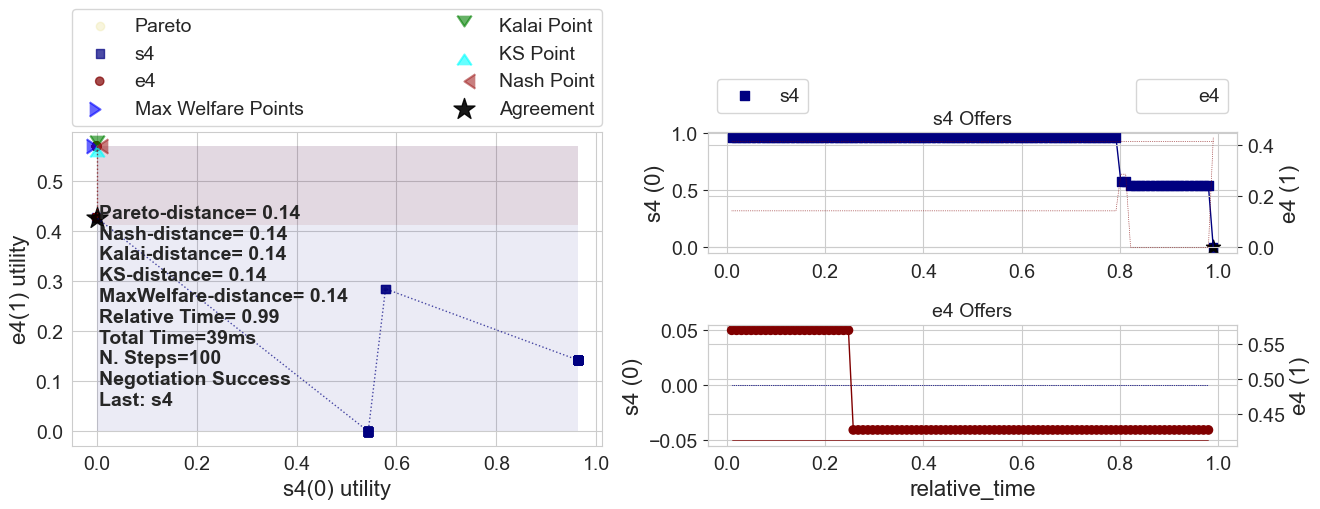

In [43]:
from anl2025 import make_dinners_scenario

results = run_session(make_dinners_scenario(n_friends=5))